<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN demo code

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

### Load the data

In [2]:
iris = datasets.load_iris()

### Identify target and features

In [3]:
X, y = iris.data, iris.target

### Standardize X

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Explore the data to look for potential clusters - see any?

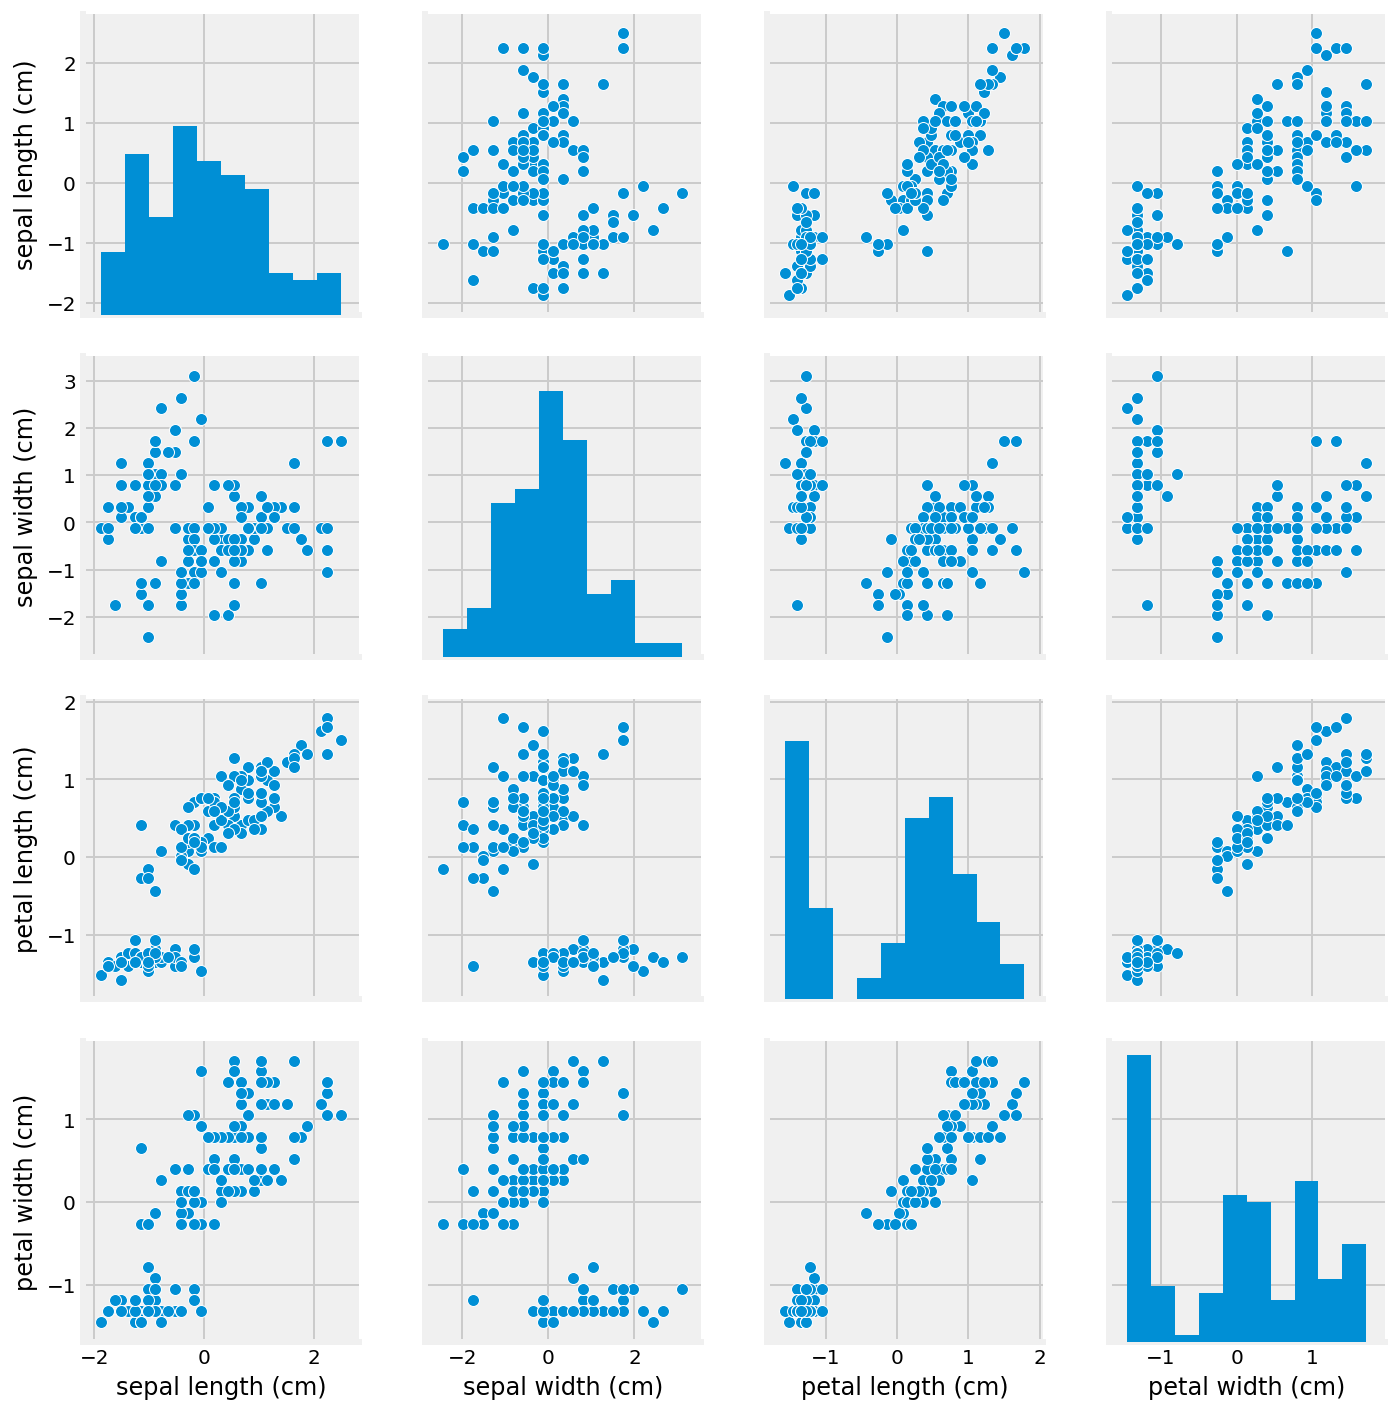

In [5]:
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))
plt.show()

### Setup DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

### Set labels

In [7]:
print("Labels:")
labels = dbscan.labels_
print(labels)

Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


Comprehension: what do these mean? How many are there?

### Identify core samples

In [8]:
# Extract core sample indices
print(dbscan.core_sample_indices_)

[  0   1   2   3   4   5   6   7   9  10  11  12  17  19  20  21  23  24
  25  26  27  28  29  30  31  34  35  36  37  38  39  40  42  43  44  45
  46  47  48  49  52  54  55  58  61  63  64  65  66  67  69  71  73  74
  75  77  78  79  80  81  82  83  86  88  89  90  91  92  94  95  96  97
  99 101 103 104 110 111 112 116 120 123 126 133 137 138 139 140 141 142
 143 145 147]


In [9]:
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
print("Core samples")
print((core_samples * 1))

Core samples
[1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0]


### Declare the number of clusters

In [10]:
n_clusters_ = len(set(labels) - set([-1]))
print(n_clusters_)

2


Now, we can use a handy chunk of code from the [Scikit documentation](http://scikit-learn.org/stable/modules/clustering.html) to measure the performance of our model.

- **Homogeneity:** each cluster contains only members of a single class.
- **Completeness:** all members of a given class are assigned to the same cluster.
- **V-measure:** the harmonic mean between homogeneity and completeness.
- **Silhouette Coefficient:** The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [11]:
print()
print('Estimated number of clusters:\t %d' % n_clusters_)
print("Homogeneity:\t\t\t %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness:\t\t\t %0.3f" % metrics.completeness_score(y, labels))
print("V-measure:\t\t\t %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient:\t\t %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters:	 2
Homogeneity:			 0.489
Completeness:			 0.510
V-measure:			 0.500
Silhouette Coefficient:		 0.349


### Count majority cluster labels according to class label 

In [12]:
np.unique(labels)

array([-1,  0,  1])

In [13]:
print(((labels[:50]) == 0).sum())
print(((labels[50:100]) == 1).sum())
print(((labels[100:]) == -1).sum())
print()
# Relabel class label 2 -> -1
y_relabeled = pd.Series(y).map(lambda x: -1 if x == 2 else x)

print("Confusion matrix:")
print(metrics.confusion_matrix(y_relabeled, labels, labels=np.unique(labels)))
print("Classification report")
print(metrics.classification_report(y_relabeled, labels, labels=np.unique(labels)))

44
39
18

Confusion matrix:
[[18  0 32]
 [ 6 44  0]
 [11  0 39]]
Classification report
             precision    recall  f1-score   support

         -1       0.51      0.36      0.42        50
          0       1.00      0.88      0.94        50
          1       0.55      0.78      0.64        50

avg / total       0.69      0.67      0.67       150



### Color and symbol map for plot

In [14]:
def color_map(x):
    if x == 0:
        return 'r'
    elif x == 1:
        return 'b'
    elif x == -1:
        return 'g'
    else:
        return 'k'


def symbol_map(x):
    if x == 0:
        return 'x'
    elif x == 1:
        return 'o'
    elif x == 2:
        return 'd'

Cluster color: -1 -> g
Cluster color: 0 -> r
Cluster color: 1 -> b
Class 0: x
Class 1: o
Class 2: d


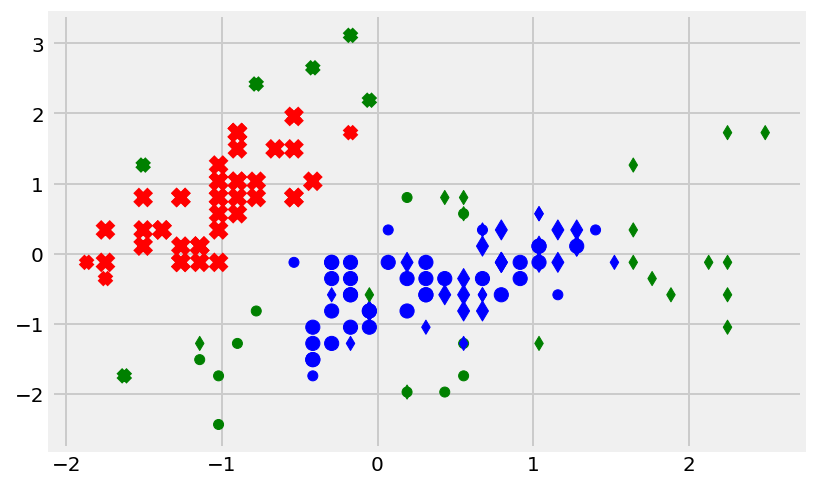

In [15]:
# use different pointsizes for core samples and non-core samples
sizes = [25, 50]

for i in range(-1, 2):
    
    print('Cluster color: {} -> {}'.format(i, color_map(i)))
    
# loop over different classes    
for i in range(3):
    
    print('Class {}: {}'.format(i, symbol_map(i)))
    
    # loop over core and non-core samples
    for j in [True, False]:
        
        plt.scatter(X[(y == i) & (core_samples == j), 0], 
                    X[(y == i) & (core_samples == j), 1],
                    # use different colors for different cluster labels
                    c=[color_map(x) for x in labels[(y == i) & (core_samples == j)]], 
                    s=sizes[j],
                    # use different markers for different calsses
                    marker=symbol_map(i))
plt.show()